# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

country = []
city = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

print(f"---------------------------")
print(f"Populating cities...")
print(f"___________________________")

x = 1
for c in cities:
    query = f"{url}appid={weather_api_key}&units={units}&q={c}"
    response = requests.get(query).json()

    try:
        country.append(response['sys']['country'])
        city.append(c.capitalize())
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        print(f"#{x}: {c.capitalize()}")
        x += 1

    except:
        print("City not found. Jumping to the next one...")
        
print(f"___________________________")
print(f"There is a total number of {x - 1} cities populated")
print(f"---------------------------")


---------------------------
Populating cities...
___________________________
City not found. Jumping to the next one...
#1: Ariquemes
#2: Bluff
#3: Jamestown
#4: Erenhot
#5: Punta arenas
#6: Pervomayskoye
#7: Ushuaia
City not found. Jumping to the next one...
#8: Victoria
#9: Folldal
#10: Touho
#11: Cabo san lucas
#12: Hobart
#13: Muli
#14: Bredasdorp
#15: Ohara
#16: Machhiwara
#17: Hamilton
#18: Comodoro rivadavia
#19: Atuona
#20: Kavieng
#21: Bam
#22: Barrow
#23: Margate
#24: Khatanga
#25: Norman wells
City not found. Jumping to the next one...
City not found. Jumping to the next one...
City not found. Jumping to the next one...
#26: Yellowknife
City not found. Jumping to the next one...
#27: Mar del plata
#28: Zabid
#29: Takhli
#30: Korla
#31: Vao
#32: Itarema
#33: East london
#34: Freeport
#35: Kaitangata
#36: Kahului
#37: Andapa
#38: Luanda
#39: Clyde river
#40: Mataura
#41: Hilo
#42: Albany
#43: Airai
City not found. Jumping to the next one...
#44: Port alfred
#45: Bathsheba
#46:

#427: Sitka
#428: Memphis
#429: Palanga
#430: Broken hill
#431: Necochea
City not found. Jumping to the next one...
#432: Xichang
#433: Rorvik
#434: Itagi
#435: Clarence town
#436: Khovu-aksy
#437: Krasnyy chikoy
#438: Veraval
#439: West wendover
#440: Vilyuysk
#441: Butare
#442: Wanaka
#443: Grindavik
#444: Krasnoborsk
#445: Inuvik
#446: Russell
#447: Presidencia roque saenz pena
City not found. Jumping to the next one...
#448: Viedma
#449: Del rio
#450: Chlorakas
#451: Sindor
#452: Chunar
#453: San francisco de macoris
#454: Road town
#455: Ibotirama
#456: Mayo
#457: Alofi
#458: Snyder
#459: Jiaojiang
#460: Ponta delgada
#461: Ridgecrest
#462: Tilichiki
#463: Tuburan
#464: Catazaja
#465: Rocha
#466: Harda
#467: Camacha
#468: Brunsbuttel
#469: Buala
#470: Turbat
City not found. Jumping to the next one...
#471: Yulara
#472: Pangnirtung
#473: Dalby
#474: Zilair
#475: Kokkola
City not found. Jumping to the next one...
#476: Bassano
#477: Novyy urengoy
#478: Santa ines
City not found. Jum

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
#Dataframe to capture all the cities
cities_df = pd.DataFrame({"Country":country,
                        "City":city,
                        "Latitude":lat,
                        "Longitude":long,
                        "Max Temp (F)":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed,   
                        "Date":date})

#CSV export
cities_df.to_csv(output_data_file, encoding="utf-8", index=True, mode='w')

#Displaying dataframe
cities_df.head()

,Country,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
0,BR,Ariquemes,-9.9133,-63.0408,91.42,40,76,2.71,1657549802
1,NZ,Bluff,-46.6000,168.3333,38.80,82,30,14.12,1657549562
2,US,Jamestown,42.0970,-79.2353,77.95,63,0,5.75,1657549562
3,CN,Erenhot,43.6475,111.9767,78.37,35,94,21.34,1657549885
4,CL,Punta arenas,-53.1500,-70.9167,24.91,80,0,14.97,1657549822


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
cities_trim_df = cities_df.loc[cities_df["Humidity"] == 100 ]
cities_trim_df.head()

,Country,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
53,US,Lompoc,34.6391,-120.4579,55.54,100,100,0.00,1657549895
62,AU,Mount gambier,-37.8333,140.7667,42.71,100,40,6.91,1657549897
257,CA,Tuktoyaktuk,69.4541,-133.0374,51.80,100,100,3.44,1657549935
320,CA,Marystown,47.1666,-55.1483,65.86,100,48,5.99,1657549946
370,FO,Vestmanna,62.1564,-7.1664,50.92,100,100,17.27,1657549955


In [41]:
#  Get the indices of cities that have humidity over 100%.
hum_indexes = []
index = cities_trim_df.index

for i in index:
    hum_indexes.append(i)
    clean_city_data = cities_df.drop
print(hum_indexes)


[53, 62, 257, 320, 370]


In [72]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = cities_df.drop(cities_trim_df.index, axis=0)
len(clean_city_data)

567

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

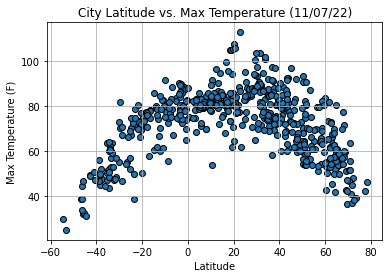

In [73]:
full_date = clean_city_data["Date"][0]
dt = datetime.utcfromtimestamp(full_date)
converted = dt.strftime("%d/%m/%y")


#Creating plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp (F)"], marker = "o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({converted})")
plt.grid()

plt.savefig("../output_data/lat_vs_maxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

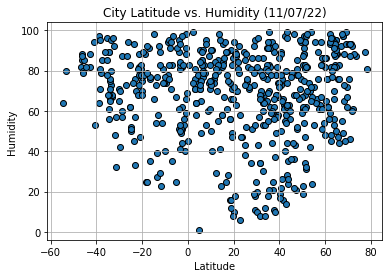

In [74]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], marker = "o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity ({converted})")
plt.grid()

plt.savefig("../output_data/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

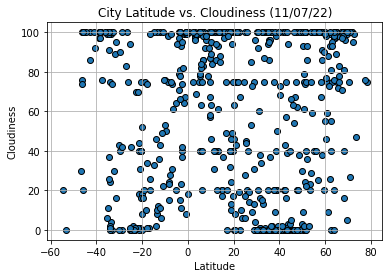

In [75]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], marker = "o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({converted})")
plt.grid()

plt.savefig("../output_data/lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

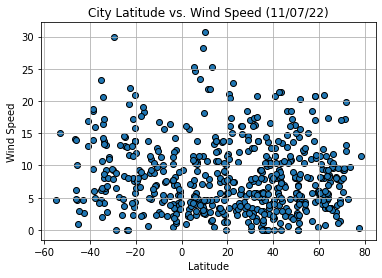

In [76]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], marker = "o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({converted})")
plt.grid()

plt.savefig("../output_data/lat_vs_windspeed.png")
plt.show()

## Linear Regression

In [165]:
north = clean_city_data[clean_city_data['Latitude']>= 0]
south = clean_city_data[clean_city_data['Latitude']< 0]

# Defining a function to create linear regression plots and add equation and line to plot
def linear_reg(x, y, ann_x, ann_y, ylabel, north_south, file_name):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    
    plt.scatter(x, y, marker='D', color="blue", alpha=1, edgecolor="black")
    
    plt.plot(x,regress,"r-")
    plt.annotate(line_eq,(ann_x, ann_y), bbox=dict(boxstyle="square,pad=0.3", fc="cyan", ec="b", lw=1))
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"{north_south} Hemisphere Latitude vs. {ylabel}")
    
    print(f"R-value: {rvalue}")
    plt.savefig(f"../output_data/{file_name}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value: -0.635686450332604


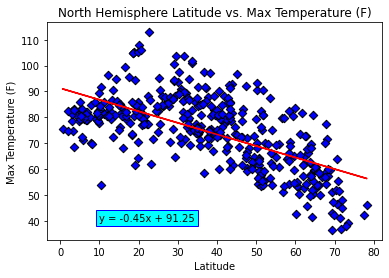

In [174]:
linear_reg(north["Latitude"], north["Max Temp (F)"], 10, 40, "Max Temperature (F)", "North", "northLat_vs_maxtemp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value: 0.8414338737541717


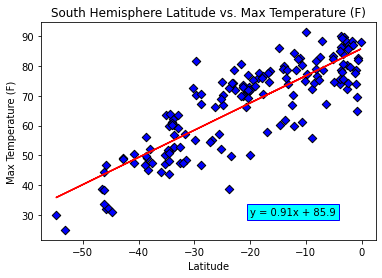

In [175]:
linear_reg(south["Latitude"], south["Max Temp (F)"], -20, 30, "Max Temperature (F)", "South", "southLat_vs_maxtemp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value: 0.07124145534194279


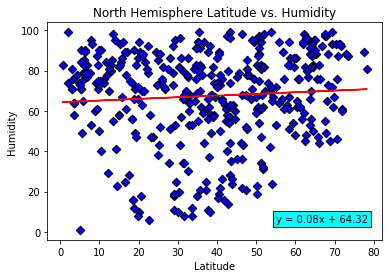

In [176]:
linear_reg(north["Latitude"], north["Humidity"], 55, 5, "Humidity", "North", "northLat_vs_humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value: -0.18311854486665782


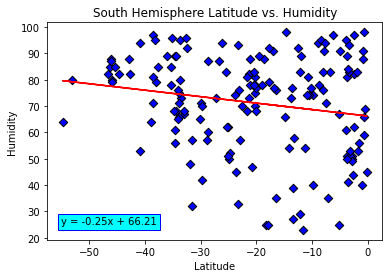

In [177]:
linear_reg(south["Latitude"], south["Humidity"], -55, 25, "Humidity", "South", "southLat_vs_humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value: 0.01856725490651328


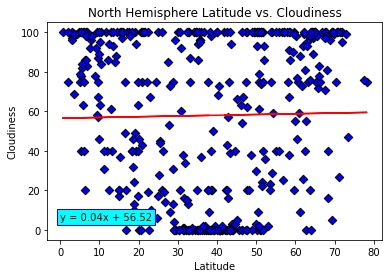

In [178]:
linear_reg(north["Latitude"], north["Cloudiness"], 0, 5, "Cloudiness", "North", "northLat_vs_cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value: -0.0062898312320401805


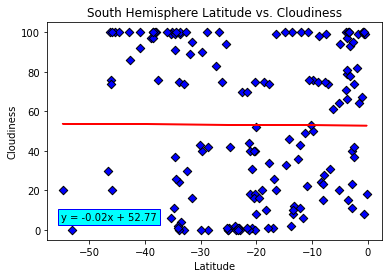

In [179]:
linear_reg(south["Latitude"], south["Cloudiness"], -55, 5, "Cloudiness", "South", "southLat_vs_cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value: -0.03883660963515143


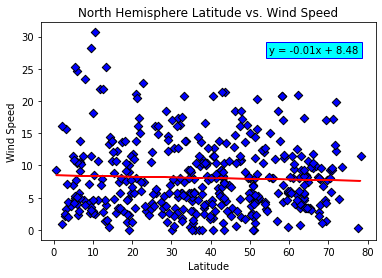

In [180]:
linear_reg(north["Latitude"], north["Wind Speed"], 55, 27.5, "Wind Speed", "North", "northLat_vs_windSpeed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value: -0.20959631495061715


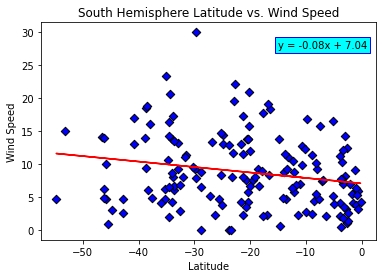

In [181]:
linear_reg(south["Latitude"], south["Wind Speed"], -15, 27.5, "Wind Speed", "South", "southLatvs_windSpeed")